# This notebook will explore EDA and Viz or our data set

### imports

In [1]:
# imports 
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')



Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# plot parameters
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'white' # or EAEAF2
plt.rcParams['font.size'] = 16

### adding a function for bar plots

In [3]:
def barh(x, y, title, xlabel):
    fig = plt.subplots(figsize=(20,16))
    
    for index, value in enumerate(y):
        plt.text(value, index, str(value))
    plt.barh(x, y, color='#99BDCB')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show();

### read in the cleaned and merged csv from the data folder

In [4]:
movies = pd.read_csv('../../../data/joined_dfs_lc')
movies

,movieId,userId,rating,title,genres,imdbId,tmdbId
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,1,5,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
2,1,7,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
3,1,15,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
4,1,17,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
...,...,...,...,...,...,...,...
100831,193581,184,4.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5476944,432131.0
100832,193583,184,3.5,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,5914996,445030.0
100833,193585,184,3.5,Flint (2017),Drama,6397426,479308.0
100834,193587,184,3.5,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,8391976,483455.0


### make a dataframe with average rating for each title

In [5]:
rated = pd.DataFrame(movies.groupby('title')['rating'].mean())
rated.sort_values('rating', ascending=False)

,rating
title,
Vagabond (Sans toit ni loi) (1985),5.0
World of Glory (1991),5.0
Colourful (Karafuru) (2010),5.0
Come and See (Idi i smotri) (1985),5.0
When Worlds Collide (1951),5.0
...,...
Don't Look Now (1973),0.5
Journey 2: The Mysterious Island (2012),0.5
Joe Dirt 2: Beautiful Loser (2015),0.5


In [6]:
rated.columns

Index(['rating'], dtype='object')

#### add the count of ratings for each title

In [7]:
rated['num_rating'] = pd.DataFrame(movies.groupby('title')['rating'].count())
rated.head()

,rating,num_rating
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


#### histogram showing distribution of ratings

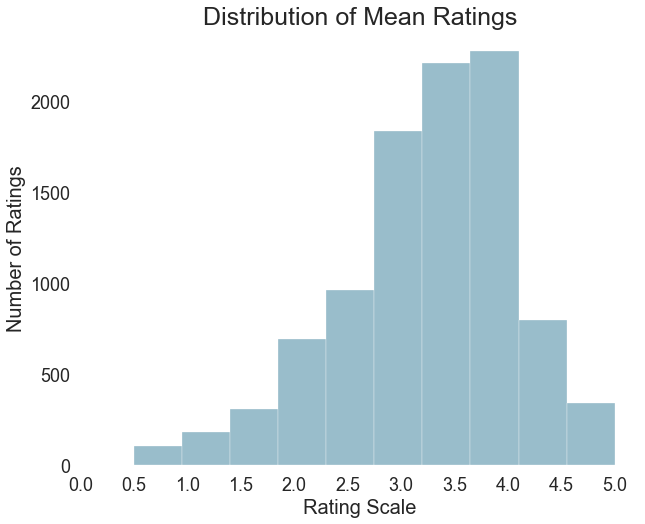

In [8]:
fig = plt.subplots(figsize=(10,8))
plt.hist(rated.rating, bins = 10, color='#99BDCB')
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.title('Distribution of Mean Ratings')
plt.xlabel('Rating Scale')
plt.ylabel('Number of Ratings')
plt.show()

### some visualizing

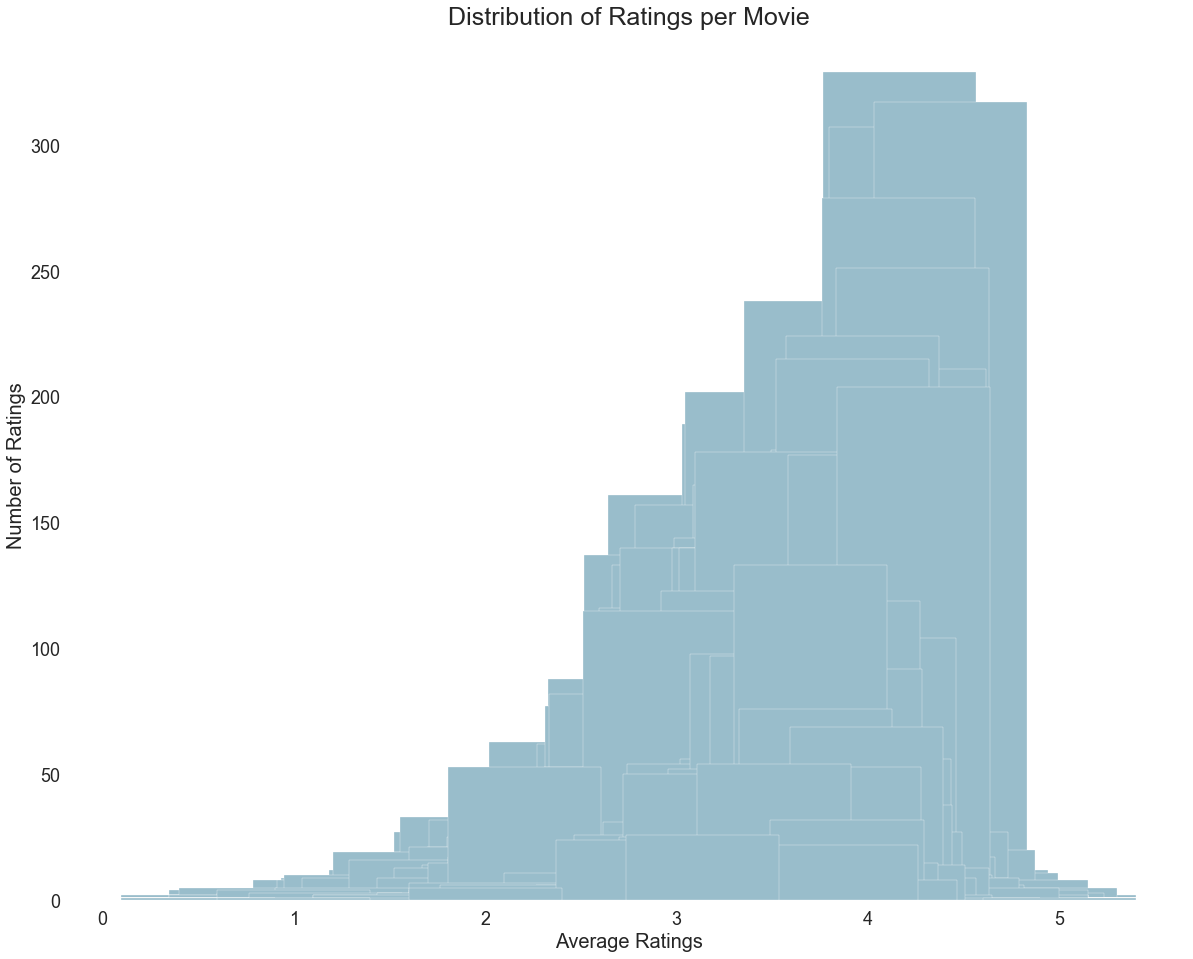

In [9]:
fig = plt.subplots(figsize=(20,16))
plt.bar(rated.rating, rated.num_rating, color='#99BDCB')
plt.title('Distribution of Ratings per Movie')
plt.xlabel('Average Ratings')
plt.ylabel('Number of Ratings')
plt.show()

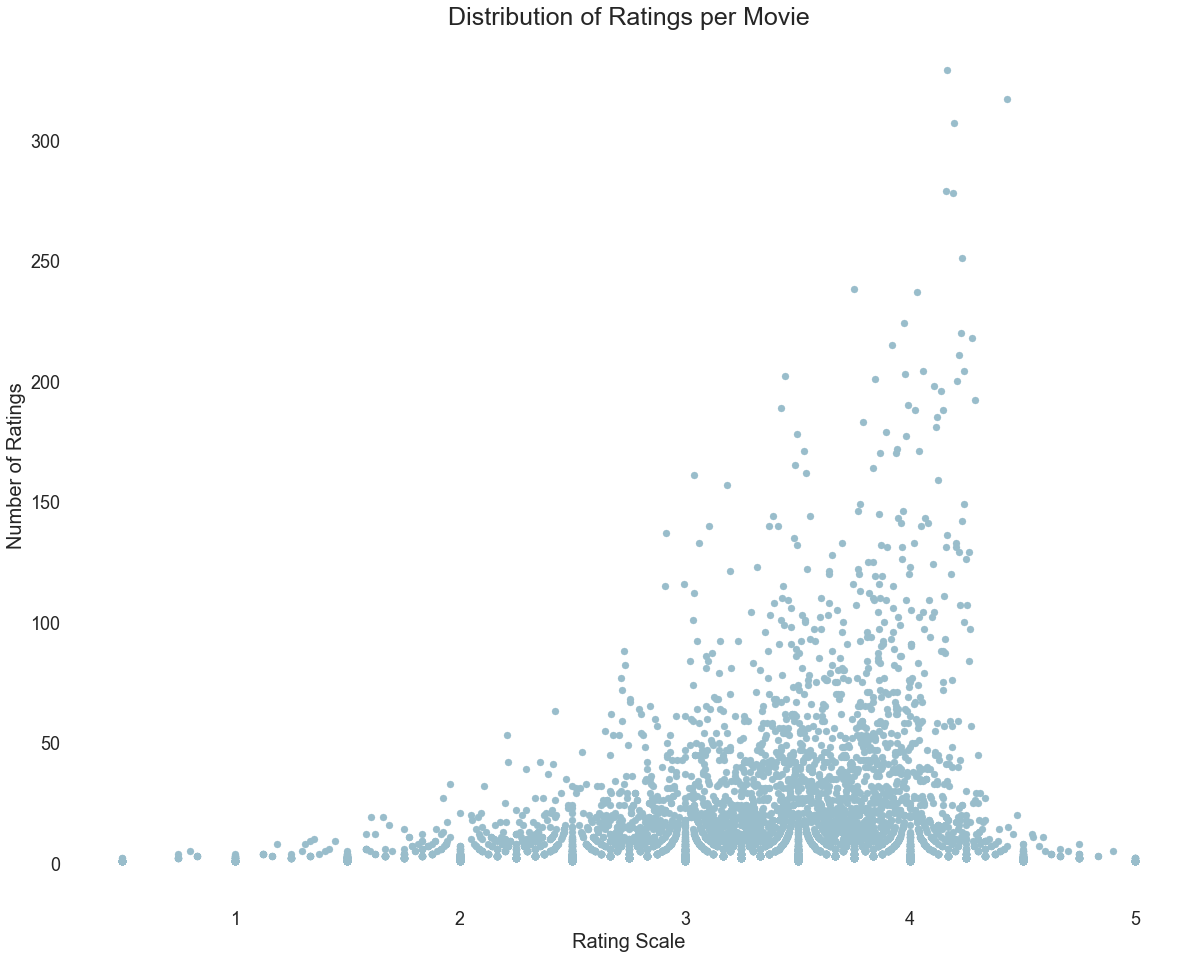

In [10]:
fig = plt.subplots(figsize=(20,16))
plt.scatter(rated.rating, rated.num_rating, c='#99BDCB')
plt.title('Distribution of Ratings per Movie')
plt.xlabel('Rating Scale')
plt.ylabel('Number of Ratings')
plt.show()

#### show the  10 most rated titles

In [11]:
most_rated = rated.sort_values('num_rating', ascending=False)[:10]
most_rated

,rating,num_rating
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


#### here are the Top 10 Rated movies visualized

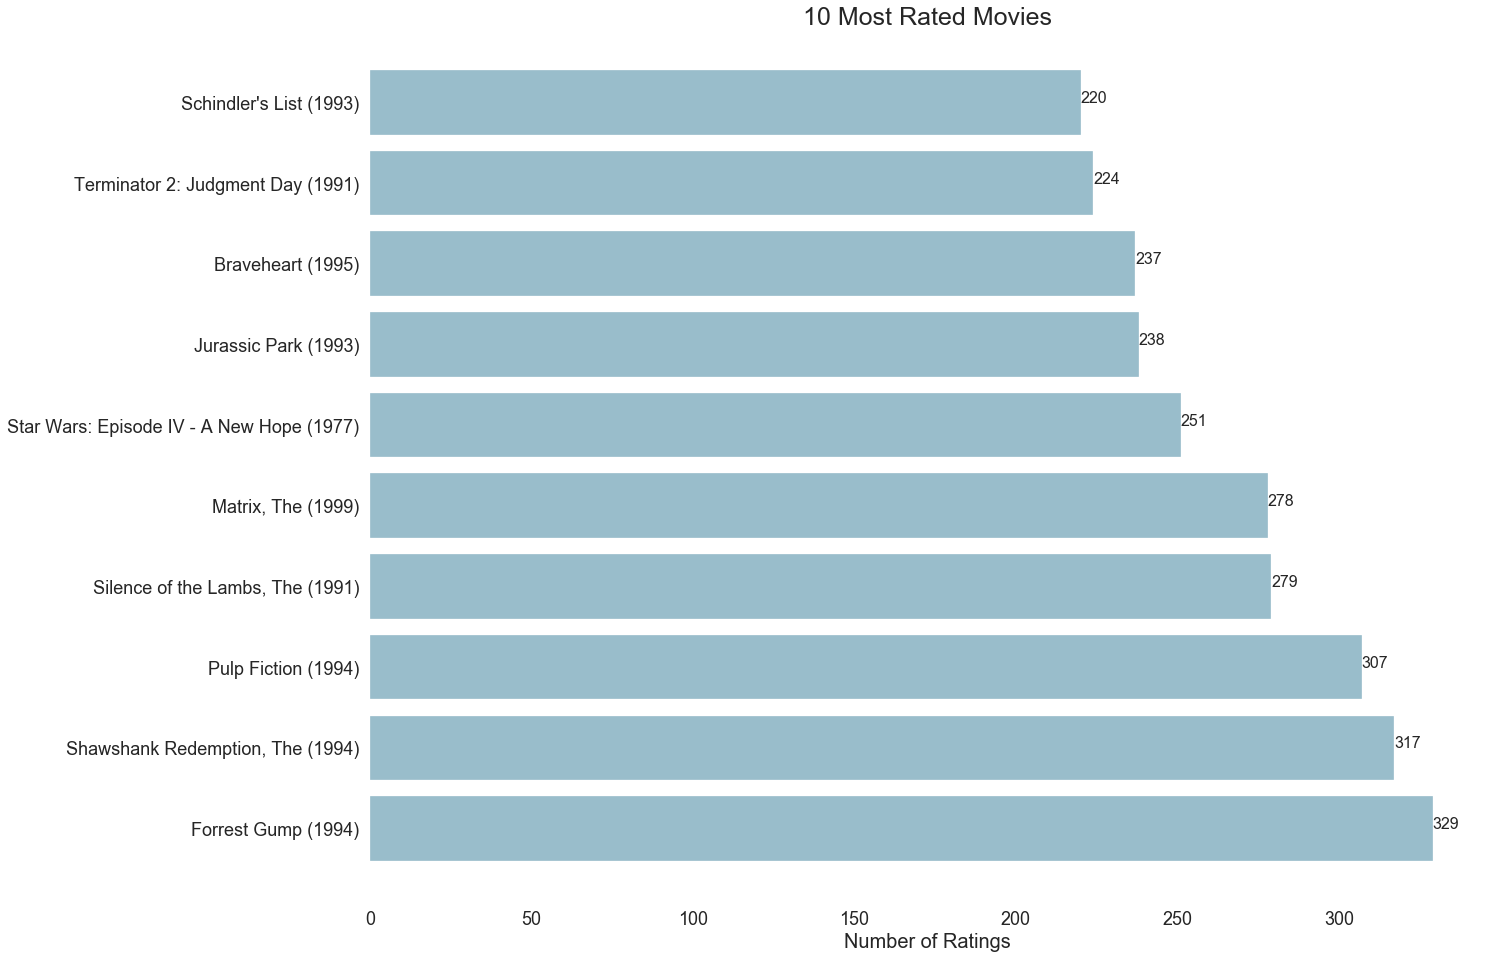

In [12]:
barh(most_rated.index, most_rated.num_rating, '10 Most Rated Movies', 'Number of Ratings')

#### and the average rating for the 10 Most Rated Movies

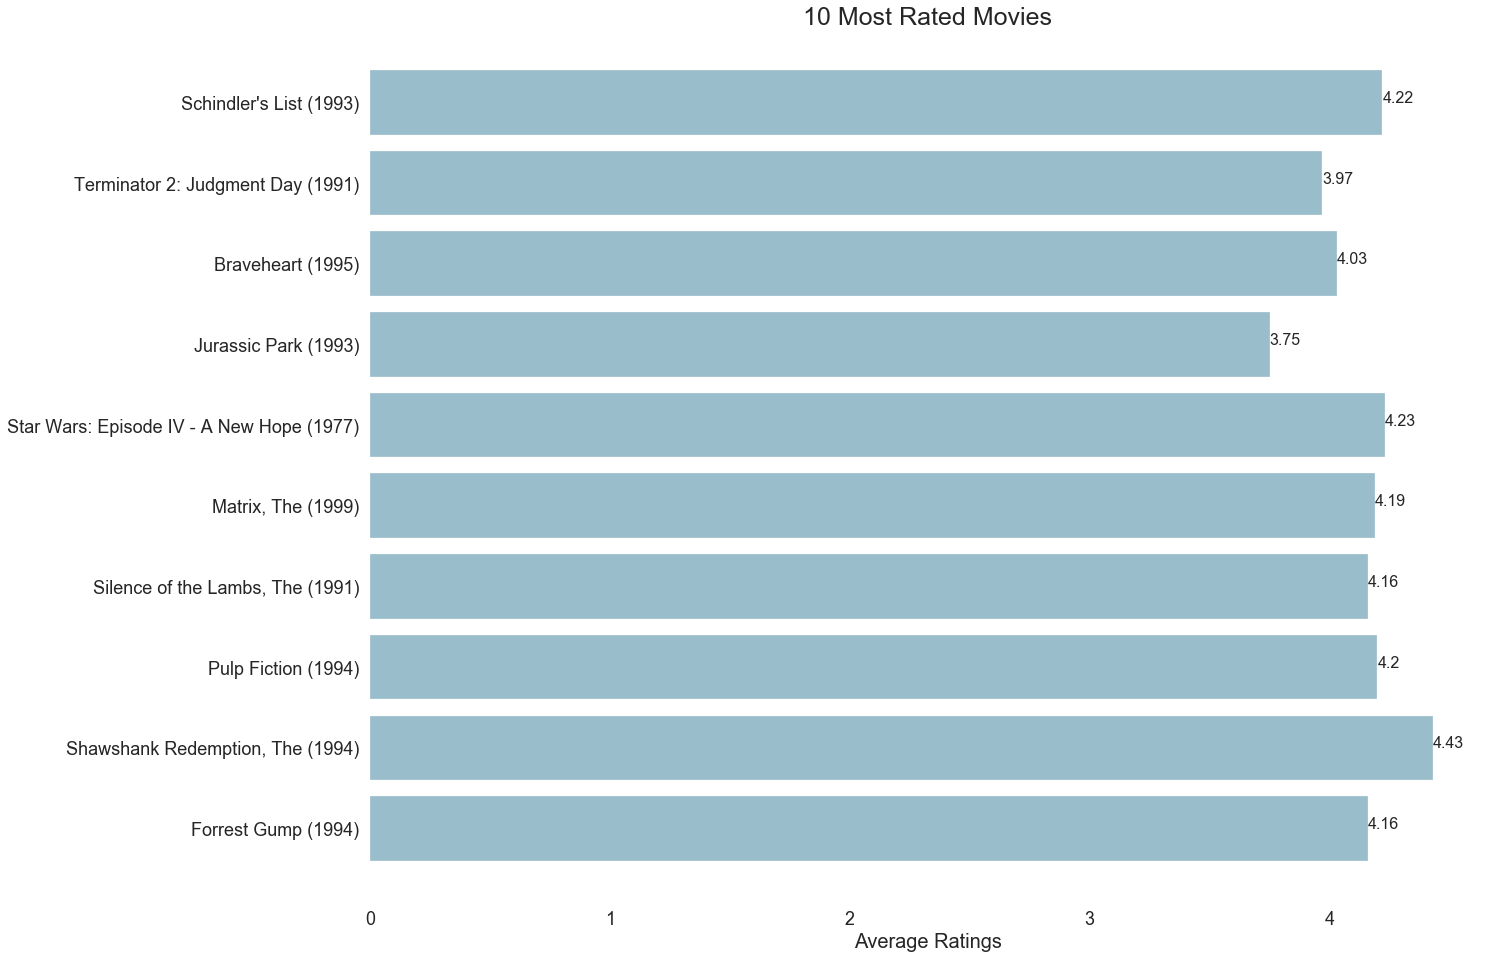

In [13]:
barh(most_rated.index, round(most_rated.rating,2), '10 Most Rated Movies', 'Average Ratings')

how about the least rated movies?

In [14]:
least_rated = rated.sort_values('num_rating', ascending=True)[:8000]
least_rated

,rating,num_rating
title,,
'71 (2014),4.000000,1
"Late Shift, The (1996)",2.500000,1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004),2.000000,1
Late Night Shopping (2001),4.500000,1
Late Marriage (Hatuna Meuheret) (2001),3.500000,1
...,...,...
What Dreams May Come (1998),3.642857,14
Accepted (2006),2.928571,14
Warm Bodies (2013),3.500000,14


### how many different genres are represented, and what are the most rated genres?

In [15]:
genre = pd.DataFrame(movies.groupby('genres')['title'].count())
genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, (no genres listed) to Western
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   title   951 non-null    int64
dtypes: int64(1)
memory usage: 14.9+ KB


In [16]:
most_rated_genre = genre.sort_values('title', ascending=False)[:10]
most_rated_genre

,title
genres,
Comedy,7196
Drama,6290
Comedy|Romance,3967
Comedy|Drama|Romance,3000
Comedy|Drama,2851
Drama|Romance,2838
Action|Adventure|Sci-Fi,2361
Crime|Drama,2315
Action|Crime|Thriller,1554


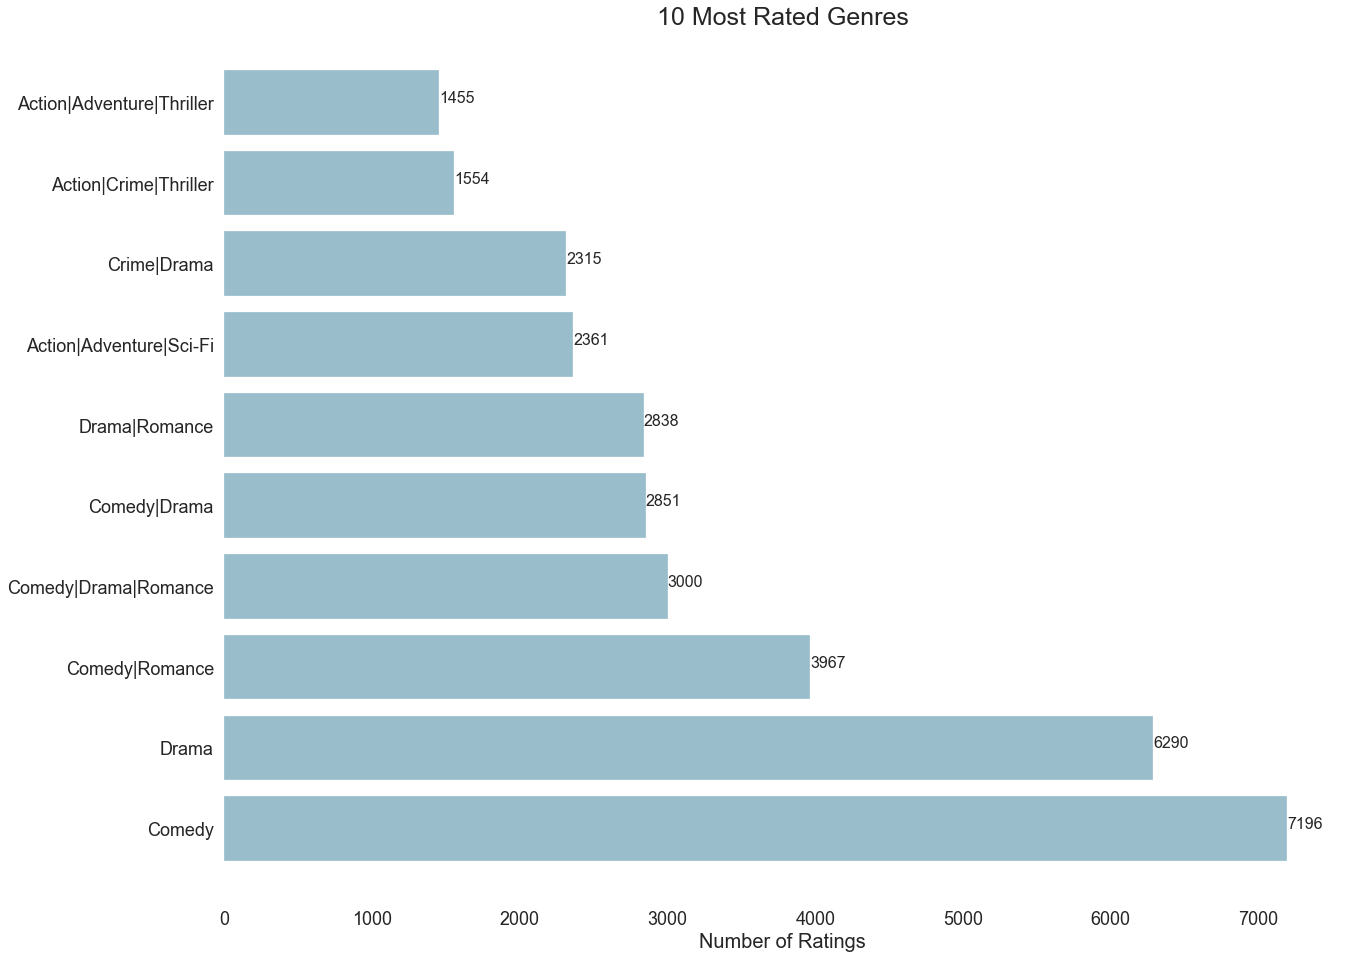

In [17]:
barh(most_rated_genre.index, most_rated_genre.title, '10 Most Rated Genres', 'Number of Ratings')

### let's look at users

In [18]:
users = pd.DataFrame(movies.groupby('userId')['rating'].count())
users.shape

(610, 1)

It looks like we have 610 users.

In [19]:
users.sort_values('rating', ascending=False)[:20]

,rating
userId,
414,2698
599,2478
474,2108
448,1864
274,1346
610,1302
68,1260
380,1218
606,1115


the "top 12" users have each rated over 1000 movies.

In [20]:
users.sort_values('rating', ascending=True)[:75]

,rating
userId,
442,20
406,20
147,20
194,20
569,20
...,...
258,25
228,25
150,26


On the flip side around 75 users have rated 25 movies or fewer

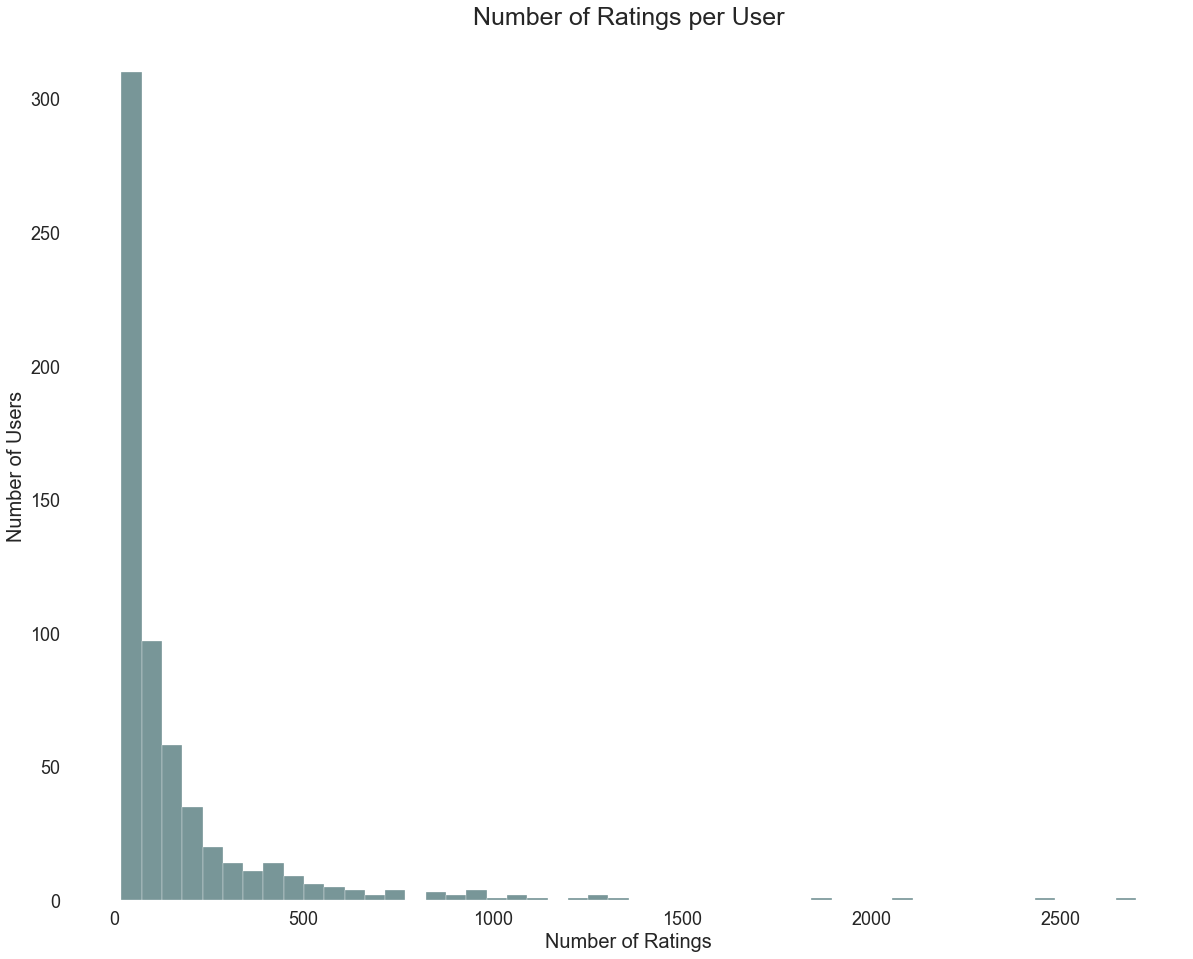

In [21]:
fig = plt.subplots(figsize=(20,16))
plt.hist(users.rating, bins = 50,color='#789698')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show();

That is very hard to read. Most users have 20-50ish ratings. A few have rated thousands of movies.

I'm going to see if I can make these a little easier to view...

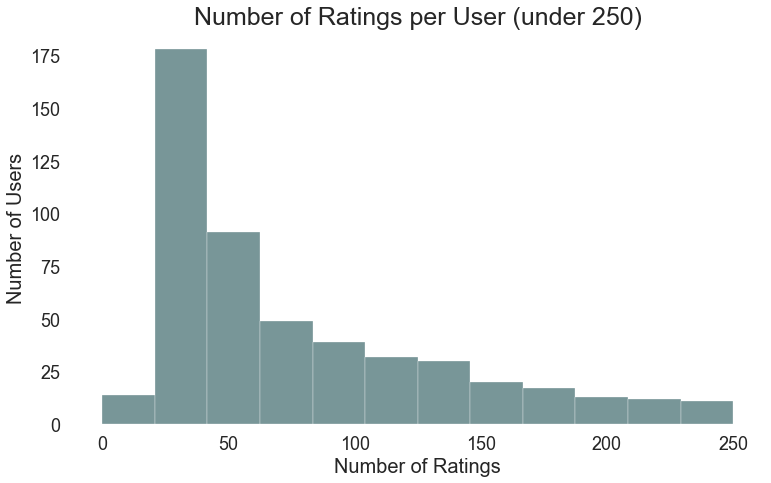

In [22]:
fig = plt.subplots(figsize=(11,7))
plt.hist(users.rating, bins = 12, range=(0,250),color='#789698')
plt.title('Number of Ratings per User (under 250)')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.tight_layout()
#plt.savefig('Users with fewer than 250 ratings.png')
plt.show();

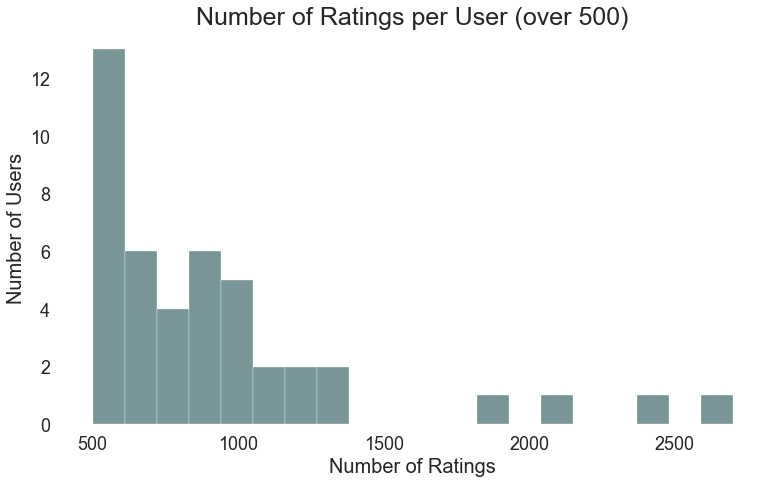

In [23]:
fig = plt.subplots(figsize=(11,7))
plt.hist(users.rating, bins = 20, range=(500,2700),color='#789698')
plt.title('Number of Ratings per User (over 500)')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.tight_layout()
#plt.savefig('Users with more than 500 ratings.png')
plt.show();

Should we look at adding a minimum threshold for number of movies rated by a user, and/or minimum number of reviews per movie to include in our model?

In order to handle outliers, I will filter out the movies that have fewer than 10 ratings, and users who rated fewer than 30 movies

In [24]:
min_movie_ratings = 10

filter_movies = movies['title'].value_counts() > min_movie_ratings
filter_movies = filter_movies[filter_movies].index.tolist()



min_user_ratings = 30
filter_users = movies['userId'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()



df_new = movies[(movies['title'].isin(filter_movies)) & (movies['userId'].isin(filter_users))]

print('The original data frame shape:\t{}'.format(movies.shape))

print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(100836, 7)
The new data frame shape:	(77152, 7)


#### On second thought... this is backwards. I need to keep the entire dataset and try to level the playing field between "more popular" and "less popular" items.

This is the long tail problem. We don't want to just return the most popular items. If a movie with fewer ratings matches our user's profile, we want that recommendation to show up.
